#### A. Importing the necessary modules 

In [8]:
import os
from firecrawl import FirecrawlApp
import pandas as pd 
from dotenv import load_dotenv

#using beautiful soup to find the elements 
from bs4 import BeautifulSoup
import requests 

# Install with pip install firecrawl-py
from firecrawl import FirecrawlApp

load_dotenv()

True

#### B. Initializing the scraping app

In [14]:
# Initializing the application 
app = FirecrawlApp(api_key=firecrawl_api_key)

In [ ]:
#going through the pages 
#Defining the lists to collect the data 
agent_list = []
developer_list = []
cost_list = []
review_list = [] 

for page in range (1,118) :
    base_link = f"https://agent.ai/?page={page}"
    #print(base_link)
    
    #bypassing dynamic pages with firecrawl scraper
    response = app.scrape_url(url=base_link, formats = [ 'html' ])

    #converting scrape html to a beautiful soup object
    soup = BeautifulSoup(response.html , 'html.parser')

    #Focusing on the AI Marketplace on each page 
    pt4_section = soup.html.select_one('.pt-4')
    
        #Extracting the relevant data on page 2
    if pt4_section:
        agent_name = soup.select(".profile__name")
        dev_name = soup.select(".profile__developer")
        review_name = soup.select(".profile__experience")
        cost_name = soup.select(".profile__salary")
        
        for agent in agent_name: 
            agent_list.append(agent.text.strip())
        
        for dev in dev_name: 
            developer_list.append(dev.text.strip())
        
        for cost in cost_name: 
            cost_list.append(cost.text.strip())
        
        for review in review_name: 
            review_list.append(review.text.strip())
    else :
        pass
    
    
    
    print(len(agent_list)  ,len(developer_list) , len(cost_list) , len(review_list))

In [ ]:
# splitting the review list
task_completions = [] 
task_reviews = [] 

for i in range(0, len(review_list), 2):
    task_completions.append(review_list[i])
    task_reviews.append(review_list[i+1])

In [47]:
#response = app.scrape_url(url="https://agent.ai/?page=2", formats = [ 'html' ])

In [48]:
#converting the response to a soup object for easy matching 
soup = BeautifulSoup(response.html , 'html.parser')



15 12 15 30


In [235]:
print(len(agent_list)  ,len(developer_list))

0 0


In [206]:
print(len(agent_list)  ,len(developer_list) , len(cost_list) , len(task_completions) , len(task_reviews))

15 12 15 15 15


#### Creating the Dataframe

In [207]:
#Creating the dataframe 
# developer information may be missing -  "agent_developer":developer_list,

agent_ai = pd.DataFrame(data = {"agent_name":agent_list,                              
                                "agent_cost":cost_list,
                                     "task_completions":task_completions,
                                     "agent_reviews":task_reviews})

In [208]:
# Enabling sting manipulation 
agent_ai = agent_ai.astype(str)

In [209]:
#Extracting the cost 
agent_ai['agent_cost'] = agent_ai['agent_cost'].apply(lambda x : int(x.split(" ",maxsplit = 4)[0]))
#Extracting the task  completions 
agent_ai['task_completions'] = agent_ai['task_completions'].apply(lambda x : (x.split(" ",maxsplit = 4)[0]))
#Extracting the reviews 
agent_ai['agent_ratings'] = agent_ai['agent_reviews'].apply(lambda x : float(x.split(" ",maxsplit = 4)[0]))
#Creating a new no of reviews column 
agent_ai['agent_review_no'] = agent_ai['agent_reviews'].apply(lambda x : int(x.split(" ",maxsplit = 4)[1].replace("(",'').replace(")",'')))

In [210]:
#dropping redundant  columns 
agent_ai.drop('agent_reviews' , axis = 1, inplace = True)

In [211]:
#Extracting the multiplier
agent_ai['multiplier'] = agent_ai['task_completions'].apply(lambda x : 1000 if 'K' in str(x) else 1)

In [212]:
#Replacing the thousands identifier
agent_ai['task_completions'] = agent_ai['task_completions'].apply(lambda x : float(x.replace("K",'').strip()))

In [213]:
#Multiplications and type conversion
agent_ai['task_completions'] = agent_ai['task_completions']*agent_ai['multiplier']
agent_ai['task_completions'] = agent_ai['task_completions'].astype(int)

#dropping helper  columns 
agent_ai.drop('multiplier' , axis = 1, inplace = True)

In [214]:
agent_ai['agent_name'] = agent_ai['agent_name'].astype(str)

In [215]:
agent_ai.reset_index(drop = True).head(15)

,agent_name,agent_cost,task_completions,agent_ratings,agent_review_no
0,Company Research Agent,1,25200,4.28,2692
1,Flux Image Generator,1,577600,4.26,21468
2,ObjectionOwl: Your AI-Powered Sales Call Objec...,1,112,5.00,6
3,YouTube Transcript Generator,1,34000,4.37,2757
4,HubSpot Marketplace Review Reply Generator,1,406,4.51,51
5,Customer Persona Builder,1,2000,4.33,98
6,App Partner Finder,1,447,4.18,11
7,Personalized Executive Outreach,1,7600,4.00,43
8,Zoom Call Ice Breaker,1,4000,4.37,134
9,3 So What's,1,1900,4.15,33


In [216]:
agent_ai.head()

,agent_name,agent_cost,task_completions,agent_ratings,agent_review_no
0,Company Research Agent,1,25200,4.28,2692
1,Flux Image Generator,1,577600,4.26,21468
2,ObjectionOwl: Your AI-Powered Sales Call Objec...,1,112,5.00,6
3,YouTube Transcript Generator,1,34000,4.37,2757
4,HubSpot Marketplace Review Reply Generator,1,406,4.51,51


In [219]:
#showing completeness 

In [217]:
import missingno as msno

<Axes: >

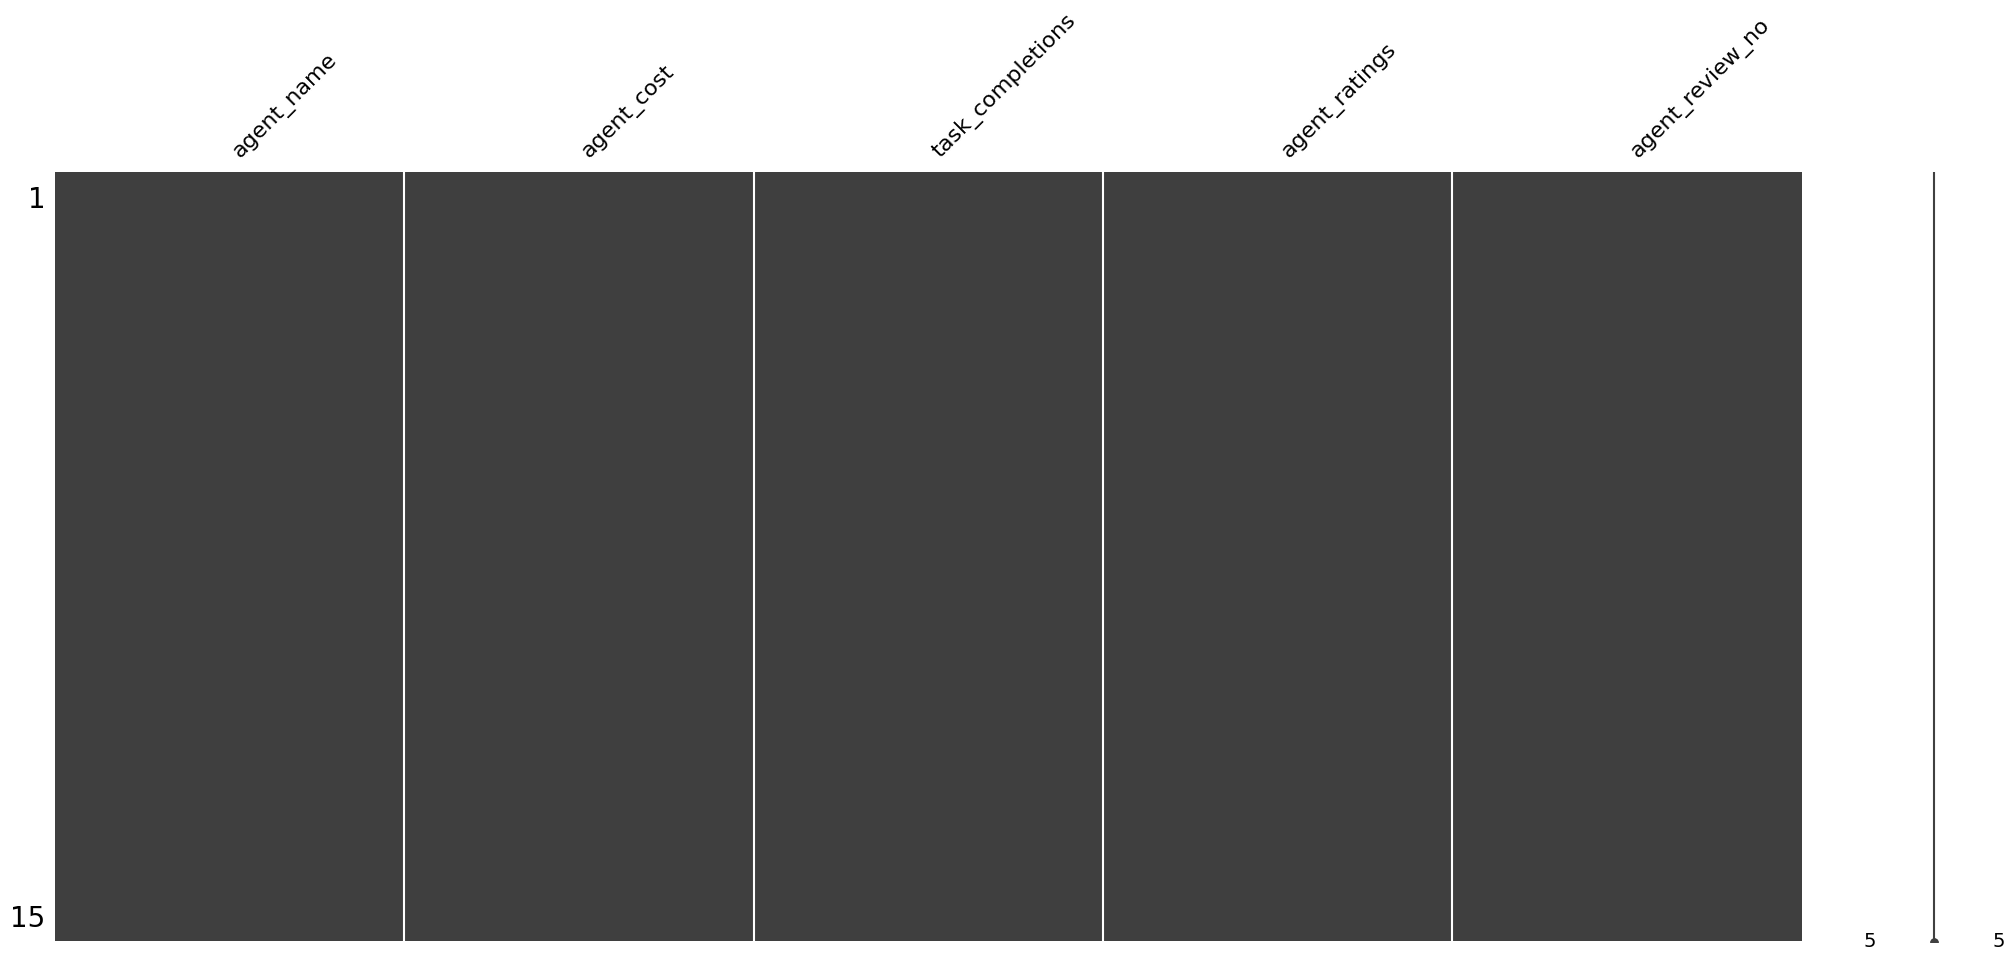

In [218]:
msno.matrix(agent_ai)